In [1]:
#if you are not using google collab please ignore this
#to mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
import pandas as pd
#Normalization
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv("/content/drive/My Drive/Group_Project/Dataset.csv")

In [ ]:
df.head()

,Sneezing,Stuffy Nose,Sore Throat,Cough,Phlegm,Body Pain,Fatigue,Headache,Chills,Fever,Sweating,Nosebleed,Confusion,Mucus,Loss of Appetite,Loss of Smell,Loss of Taste,Irregular Periods,Excessive hair growth,Chest Pain,Weight Gain,Chest Discomfort,Shortness of Breath,Hoarseness,Puffy Face,Constipation,Muscle Weakness,Increase sensitivity to cold,Nausea,Vomiting,Diarrhea,Low Body Temperature,Wheezing,Cold,Trouble sleeping,Allergy,Swelling,Muscle Ache,Rash,Rashes,...,Fidgeting,Easily Distracted,Interrupting,Avoiding activities,Skin discoloration,High blood pressure,Oily Skin,Muscle Pain,Obesity,Decrease range of Motion,Short tempered,Indigestion,Abdominal pain,Dizziness,Whiteheads,Pain during urination,Frequent Urination,Blood in urin,Difficulty Urinating,Blackheads,Cystic lesions,Pimples,Redness,Infection,Tiredness,Sleeplessness,Daytime sleepiness,Irritable.1,Depression,Anxiety,Forgetfulness,Pain,Low Blodd pressure,Dry mouth,Dry Skin,Muscle Cramps,Missed menstrual cycle,Dehydration,Stiffness,Disease
0,0,0,3,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,HIV/AIDS
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,PREGNANCY
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ADHD
3,0,0,0,2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,PNEUMONIA
4,0,0,0,0,0,0,2,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,HYPERTENSION


In [ ]:
#checking shape of the data
df.shape

(25000, 101)

In [ ]:
#checking null values
df.notnull


<bound method DataFrame.notnull of        Sneezing  Stuffy Nose  Sore Throat  ...  Dehydration  Stiffness       Disease
0             0            0            3  ...            0          0      HIV/AIDS
1             0            0            0  ...            0          0     PREGNANCY
2             0            0            0  ...            0          0          ADHD
3             0            0            0  ...            0          0     PNEUMONIA
4             0            0            0  ...            0          0  HYPERTENSION
...         ...          ...          ...  ...          ...        ...           ...
24995         0            0            0  ...            0          0       MEASLES
24996         0            0            0  ...            0          0  DENGUE FEVER
24997         1            0            1  ...            0          0   VIRAL FEVER
24998         0            0            0  ...            0          0      INSOMNIA
24999         0            0  

In [ ]:
#Check for Null and missing values
df.isnull().values.any()

False

In [4]:
#splitting categorical column and numerical column 
#normalising numerical columns and then merging again.
target_col = ["Disease"]
cat_cols   = df.nunique()[df.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in df.columns if x not in cat_cols + target_col]
min_max_scaler = preprocessing.MinMaxScaler()
scaled = min_max_scaler.fit_transform(df[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

In [5]:
#dropping original values merging scaled values for numerical columns
df_og = df.copy()
df = df.drop(columns = num_cols,axis = 1)
df = df.merge(scaled,left_index=True,right_index=True,how = "left")

In [ ]:
df.head()

,Sweating,Nosebleed,Confusion,Mucus,Loss of Appetite,Loss of Smell,Loss of Taste,Hoarseness,Muscle Weakness,Increase sensitivity to cold,Low Body Temperature,Cold,Trouble sleeping,Allergy,Fluid accumulation,Vision problems,Weakness,Unexplained Bleeding,Unexplained Bruising,Itchy nose,Itchy mouth,itchy throat,Irritable,Dandruff,Night Sweats,Mouth Ulcers,Interrupting,Avoiding activities,Skin discoloration,Oily Skin,Obesity,Short tempered,Dizziness,Blood in urin,Infection,Irritable.1,Depression,Anxiety,Forgetfulness,Low Blodd pressure,...,Constipation,Nausea,Vomiting,Diarrhea,Wheezing,Swelling,Muscle Ache,Rash,Rashes,Red Spots,Itchy,Eye pain,Increase of sweating,Itchy Eyes,Running nose,Unresponsiveness,Unfocused,Impulsiveness,Fidgeting,Easily Distracted,High blood pressure,Muscle Pain,Decrease range of Motion,Indigestion,Abdominal pain,Whiteheads,Pain during urination,Frequent Urination,Difficulty Urinating,Blackheads,Cystic lesions,Pimples,Redness,Tiredness,Sleeplessness,Daytime sleepiness,Pain,Dry Skin,Missed menstrual cycle,Stiffness
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.6,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.2,0.0,0.2,0.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.2,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.2,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#reindexing columns
column_names_full = ['Sweating',
 'Nosebleed',
 'Confusion',
 'Mucus',
 'Loss of Appetite',
 'Loss of Smell',
 'Loss of Taste',
 'Hoarseness',
 'Muscle Weakness',
 'Increase sensitivity to cold',
 'Low Body Temperature',
 'Cold',
 'Trouble sleeping',
 'Allergy',
 'Fluid accumulation',
 'Vision problems',
 'Weakness',
 'Unexplained Bleeding',
 'Unexplained Bruising',
 'Itchy nose',
 'Itchy mouth',
 'itchy throat',
 'Irritable',
 'Dandruff',
 'Night Sweats',
 'Mouth Ulcers',
 'Interrupting',
 'Avoiding activities',
 'Skin discoloration',
 'Oily Skin',
 'Obesity',
 'Short tempered',
 'Dizziness',
 'Blood in urin',
 'Infection',
 'Irritable.1',
 'Depression',
 'Anxiety',
 'Forgetfulness',
 'Low Blodd pressure',
 'Dry mouth',
 'Muscle Cramps',
 'Dehydration',
 'Sneezing',
 'Stuffy Nose',
 'Sore Throat',
 'Cough',
 'Phlegm',
 'Body Pain',
 'Fatigue',
 'Headache',
 'Chills',
 'Fever',
 'Irregular Periods',
 'Excessive hair growth',
 'Chest Pain',
 'Weight Gain',
 'Chest Discomfort',
 'Shortness of Breath',
 'Puffy Face',
 'Constipation',
 'Nausea',
 'Vomiting',
 'Diarrhea',
 'Wheezing',
 'Swelling',
 'Muscle Ache',
 'Rash',
 'Rashes',
 'Red Spots',
 'Itchy',
 'Eye pain',
 'Increase of sweating',
 'Itchy Eyes',
 'Running nose',
 'Unresponsiveness',
 'Unfocused',
 'Impulsiveness',
 'Fidgeting',
 'Easily Distracted',
 'High blood pressure',
 'Muscle Pain',
 'Decrease range of Motion',
 'Indigestion',
 'Abdominal pain',
 'Whiteheads',
 'Pain during urination',
 'Frequent Urination',
 'Difficulty Urinating',
 'Blackheads',
 'Cystic lesions',
 'Pimples',
 'Redness',
 'Tiredness',
 'Sleeplessness',
 'Daytime sleepiness',
 'Pain',
 'Dry Skin',
 'Missed menstrual cycle',
 'Stiffness',
 'Disease']
df = df.reindex(columns=column_names_full)



In [ ]:
df.head()

,Sweating,Nosebleed,Confusion,Mucus,Loss of Appetite,Loss of Smell,Loss of Taste,Hoarseness,Muscle Weakness,Increase sensitivity to cold,Low Body Temperature,Cold,Trouble sleeping,Allergy,Fluid accumulation,Vision problems,Weakness,Unexplained Bleeding,Unexplained Bruising,Itchy nose,Itchy mouth,itchy throat,Irritable,Dandruff,Night Sweats,Mouth Ulcers,Interrupting,Avoiding activities,Skin discoloration,Oily Skin,Obesity,Short tempered,Dizziness,Blood in urin,Infection,Irritable.1,Depression,Anxiety,Forgetfulness,Low Blodd pressure,...,Nausea,Vomiting,Diarrhea,Wheezing,Swelling,Muscle Ache,Rash,Rashes,Red Spots,Itchy,Eye pain,Increase of sweating,Itchy Eyes,Running nose,Unresponsiveness,Unfocused,Impulsiveness,Fidgeting,Easily Distracted,High blood pressure,Muscle Pain,Decrease range of Motion,Indigestion,Abdominal pain,Whiteheads,Pain during urination,Frequent Urination,Difficulty Urinating,Blackheads,Cystic lesions,Pimples,Redness,Tiredness,Sleeplessness,Daytime sleepiness,Pain,Dry Skin,Missed menstrual cycle,Stiffness,Disease
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HIV/AIDS
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.6,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.2,0.0,0.2,0.0,PREGNANCY
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.2,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADHD
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.2,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PNEUMONIA
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HYPERTENSION


Text(0, 0.5, 'Frequency')

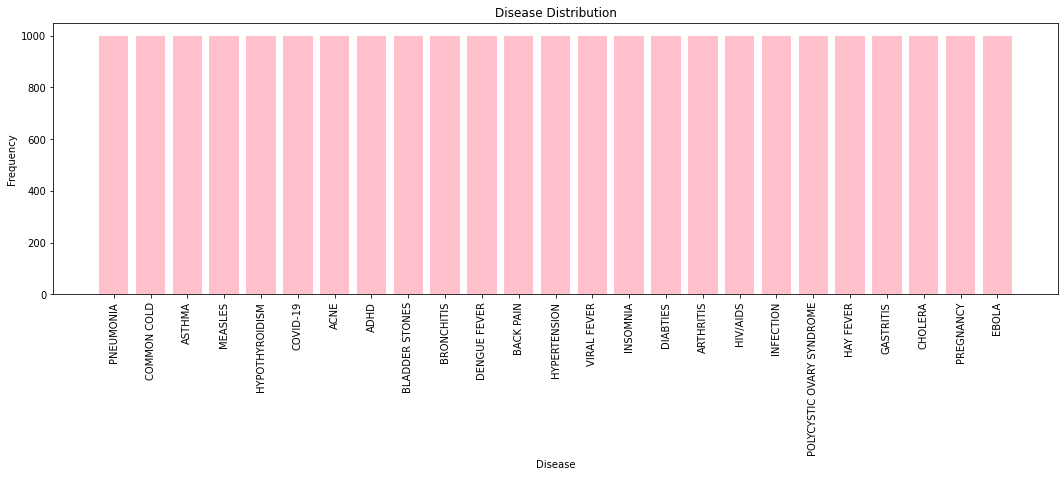

In [ ]:
#checking distribution of the target values
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.pyplot as plt
# create a figure and axis 
fig, ax = plt.subplots(figsize=(18,5)) 
plt.xticks(rotation=90)
# count the occurrence of each class 
data = df['Disease'].value_counts() 
# get x and y data 
Diseases = data.index 
frequency = data.values 
# create bar chart 
ax.bar(Diseases, frequency, color ='pink') 
# set title and labels 
ax.set_title('Disease Distribution') 
ax.set_xlabel('Disease') 
ax.set_ylabel('Frequency')


In [ ]:
#summary statistics for the diseases and the symptoms which contribute the most
df.groupby("Disease").describe()

Sneezing                        ... Stiffness               
                             count   mean       std  min  ...       25%  50%  75%  max
Disease                                                   ...                         
ACNE                        1000.0  0.000  0.000000  0.0  ...       0.0  0.0  0.0  0.0
ADHD                        1000.0  0.000  0.000000  0.0  ...       0.0  0.0  0.0  0.0
ARTHRITIS                   1000.0  0.000  0.000000  0.0  ...       1.0  3.0  4.0  5.0
ASTHMA                      1000.0  0.000  0.000000  0.0  ...       0.0  0.0  0.0  0.0
BACK PAIN                   1000.0  0.000  0.000000  0.0  ...       0.0  0.0  0.0  0.0
BLADDER STONES              1000.0  0.000  0.000000  0.0  ...       0.0  0.0  0.0  0.0
BRONCHITIS                  1000.0  0.000  0.000000  0.0  ...       0.0  0.0  0.0  0.0
CHOLERA                     1000.0  0.000  0.000000  0.0  ...       0.0  0.0  0.0  0.0
COMMON COLD                 1000.0  2.563  1.716093  0.0  ...       0.0  0.0  0.0  0.0
COVID-19                    1000.0  0.000  0.000000  0.0  ...       0.0  0.0  0.0  0.0
DENGUE FEVER                1000.0  0.000  0.000000  0.0  ...       0.0  0.0  0.0  0.0
DIABTIES                    1000.0  0.000  0.000000  0.0  ...       0.0  0.0  0.0  0.0
EBOLA                       1000.0  0.000  0.000000  0.0  ...       0.0  0.0  0.0  0.0
GASTRITIS                   1000.0  0.000  0.000000  0.0  ...       0.0  0.0  0.0  0.0
HAY FEVER                   1000.0  2.424  1.735291  0.0  ...       0.0  0.0  0.0  0.0
HIV/AIDS                    1000.0  0.000  0.000000  0.0  ...       0.0  0.0  0.0  0.0
HYPERTENSION                1000.0  0.000  0.000000  0.0  ...       0.0  0.0  0.0  0.0
HYPOTHYROIDISM              1000.0  0.000  0.000000  0.0  ...       0.0  0.0  0.0  0.0
INFECTION                   1000.0  0.000  0.000000  0.0  ...       0.0  0.0  0.0  0.0
INSOMNIA                    1000.0  0.000  0.000000  0.0  ...       0.0  0.0  0.0  0.0
MEASLES                     1000.0  0.000  0.000000  0.0  ...       0.0  0.0  0.0  0.0
PNEUMONIA                   1000.0  0.000  0.000000  0.0  ...       0.0  0.0  0.0  0.0
POLYCYSTIC OVARY SYNDROME   1000.0  0.000  0.000000  0.0  ...       0.0  0.0  0.0  0.0
PREGNANCY                   1000.0  0.000  0.000000  0.0  ...       0.0  0.0  0.0  0.0
VIRAL FEVER                 1000.0  0.523  0.499721  0.0  ...       0.0  0.0  0.0  0.0

[25 rows x 800 columns]

In [7]:
#create a data frame dictionary to store your data frames
target = df.Disease.unique()
DataFrameDict = {elem : pd.DataFrame for elem in target}

for key in DataFrameDict.keys():
    DataFrameDict[key] = df[:][df.Disease == key]

In [ ]:
DataFrameDict['PREGNANCY']

,Sweating,Nosebleed,Confusion,Mucus,Loss of Appetite,Loss of Smell,Loss of Taste,Hoarseness,Muscle Weakness,Increase sensitivity to cold,Low Body Temperature,Cold,Trouble sleeping,Allergy,Fluid accumulation,Vision problems,Weakness,Unexplained Bleeding,Unexplained Bruising,Itchy nose,Itchy mouth,itchy throat,Irritable,Dandruff,Night Sweats,Mouth Ulcers,Interrupting,Avoiding activities,Skin discoloration,Oily Skin,Obesity,Short tempered,Dizziness,Blood in urin,Infection,Irritable.1,Depression,Anxiety,Forgetfulness,Low Blodd pressure,...,Nausea,Vomiting,Diarrhea,Wheezing,Swelling,Muscle Ache,Rash,Rashes,Red Spots,Itchy,Eye pain,Increase of sweating,Itchy Eyes,Running nose,Unresponsiveness,Unfocused,Impulsiveness,Fidgeting,Easily Distracted,High blood pressure,Muscle Pain,Decrease range of Motion,Indigestion,Abdominal pain,Whiteheads,Pain during urination,Frequent Urination,Difficulty Urinating,Blackheads,Cystic lesions,Pimples,Redness,Tiredness,Sleeplessness,Daytime sleepiness,Pain,Dry Skin,Missed menstrual cycle,Stiffness,Disease
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.6,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.2,0.0,0.2,0.0,PREGNANCY
9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.8,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.8,0.0,PREGNANCY
17,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.6,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,0.0,0.6,0.0,PREGNANCY
21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,1.0,0.0,PREGNANCY
40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.2,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0.8,0.0,0.8,0.0,PREGNANCY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24888,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.8,0.0,PREGNANCY
24929,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.2,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.2,0.0,0.2,0.0,PREGNANCY
24952,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0.2,0.0,1.0,0.0,PREGNANCY
24979,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.8,0.0,1.0,0.0,PREGNANCY


In [ ]:
target.size

25

In [11]:
df['Disease'].value_counts(normalize = False)

PREGNANCY                    1000
ADHD                         1000
BRONCHITIS                   1000
EBOLA                        1000
COMMON COLD                  1000
DIABTIES                     1000
BACK PAIN                    1000
BLADDER STONES               1000
CHOLERA                      1000
DENGUE FEVER                 1000
INSOMNIA                     1000
HAY FEVER                    1000
VIRAL FEVER                  1000
HYPOTHYROIDISM               1000
MEASLES                      1000
INFECTION                    1000
POLYCYSTIC OVARY SYNDROME    1000
COVID-19                     1000
ASTHMA                       1000
HYPERTENSION                 1000
ARTHRITIS                    1000
HIV/AIDS                     1000
ACNE                         1000
GASTRITIS                    1000
PNEUMONIA                    1000
Name: Disease, dtype: int64

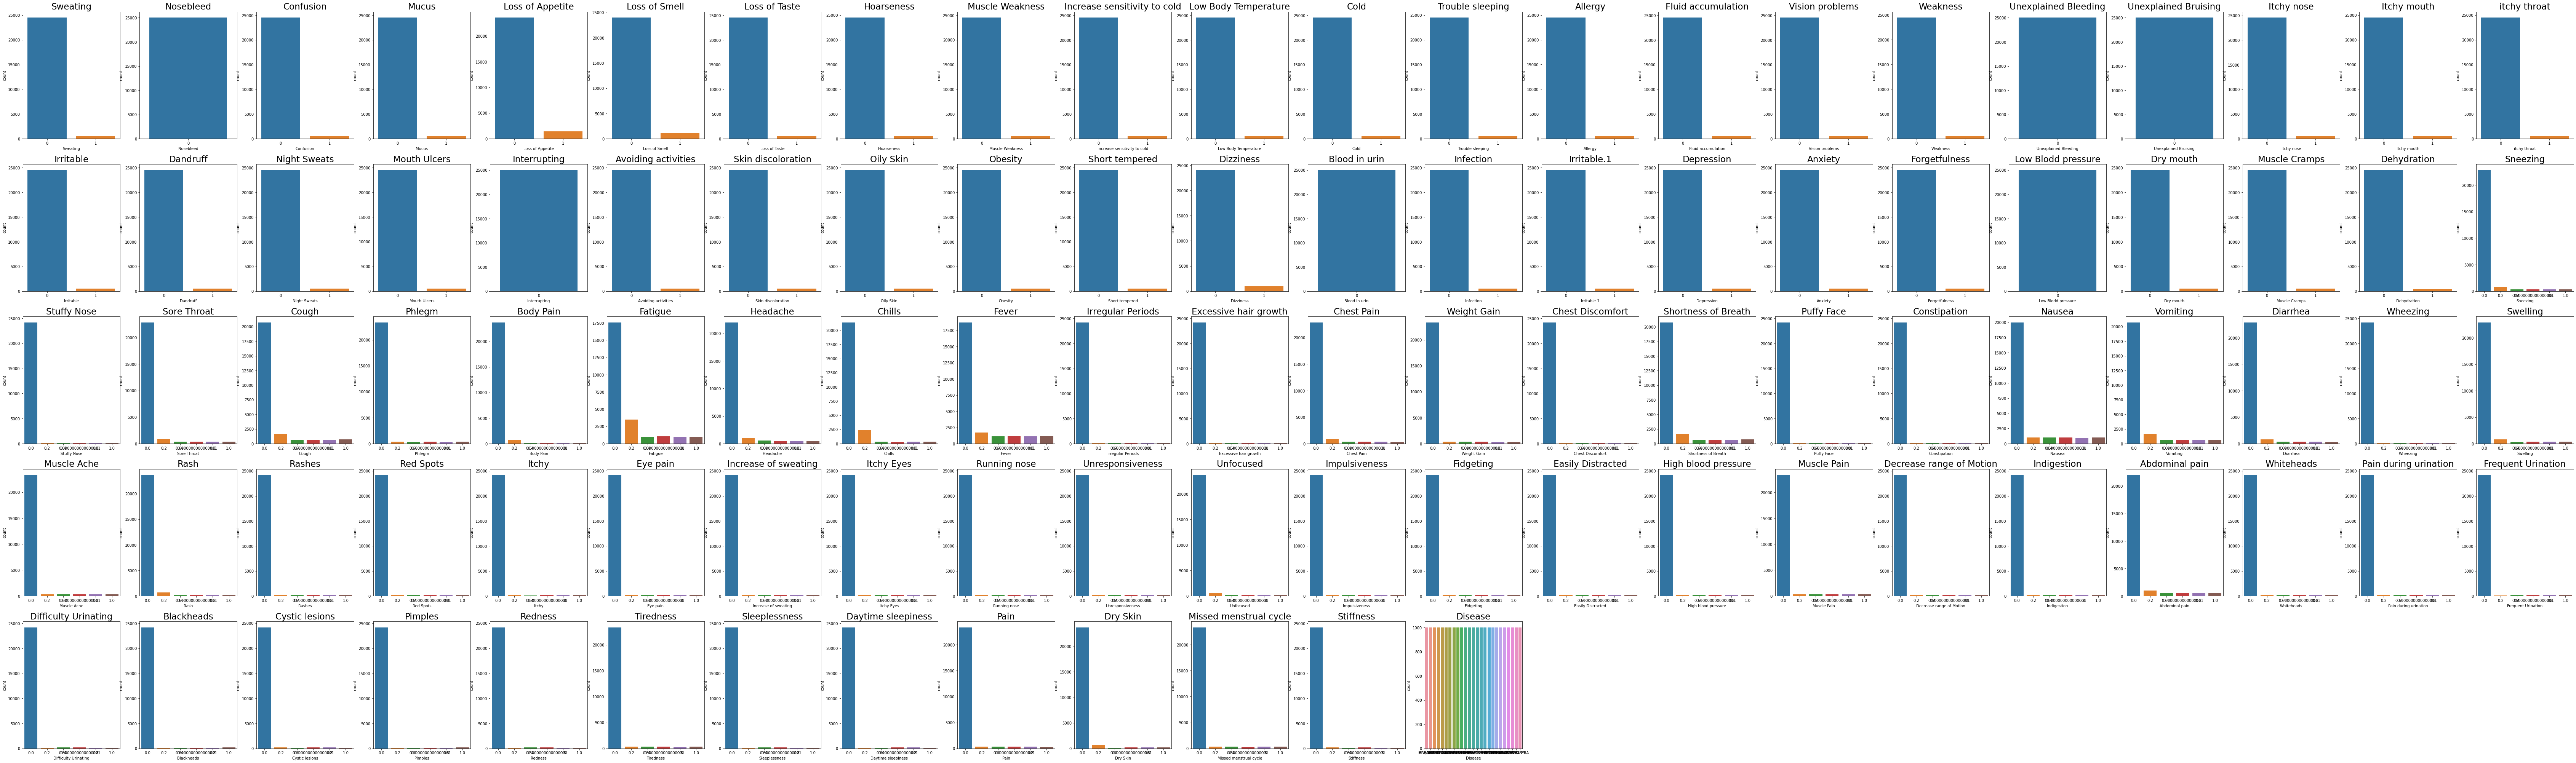

In [17]:
import matplotlib.pyplot as plt
#Analyzing each symptoms/variable
for x in range(df.shape[1]):
    plt.subplot(7,22,x+1)
    plt.subplots_adjust(left = 0.5, right = 16 , top = 10, bottom = 0.5)
    sns.countplot(df[df.columns[x]]).set_title(df.columns[x],fontsize=23)

In [8]:
#selecting columns for a disease whose sum not equals to zero
for key in DataFrameDict.keys():
    l = list(DataFrameDict[key].columns.values)
    l.pop()
    hl=[]
    for l in l:
        if sum(DataFrameDict[key][l]) != 0:
            hl.append(l)

    #hl.append('DISEASE')
    DataFrameDict[key] = DataFrameDict[key][hl]

In [ ]:
DataFrameDict['ADHD']

,Avoiding activities,Impulsiveness,Fidgeting,Easily Distracted
2,1,0.4,0.2,0.8
15,1,0.8,0.4,0.0
28,0,0.8,0.6,1.0
30,1,0.8,0.4,0.4
36,1,0.4,0.8,0.4
...,...,...,...,...
24818,1,0.4,0.2,0.2
24866,1,1.0,1.0,0.8
24885,0,0.8,1.0,0.2
24941,1,0.8,0.8,0.4


In [ ]:
list(target)

['HIV/AIDS',
 'PREGNANCY',
 'ADHD',
 'PNEUMONIA',
 'HYPERTENSION',
 'ACNE',
 'VIRAL FEVER',
 'BRONCHITIS',
 'INFECTION',
 'DIABTIES',
 'ASTHMA',
 'MEASLES',
 'POLYCYSTIC OVARY SYNDROME',
 'COMMON COLD',
 'DENGUE FEVER',
 'HYPOTHYROIDISM',
 'EBOLA',
 'INSOMNIA',
 'BLADDER STONES',
 'HAY FEVER',
 'BACK PAIN',
 'GASTRITIS',
 'ARTHRITIS',
 'COVID-19',
 'CHOLERA']

HIV/AIDS


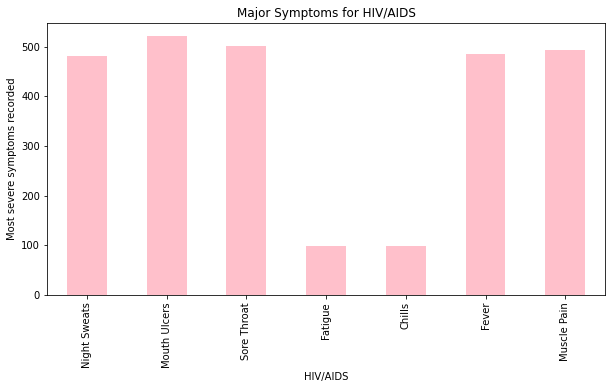

PREGNANCY


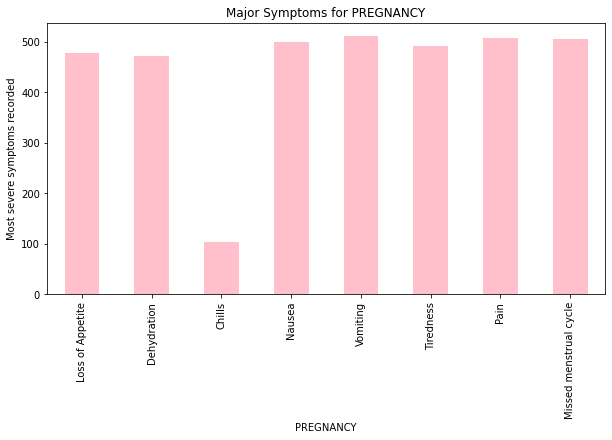

ADHD


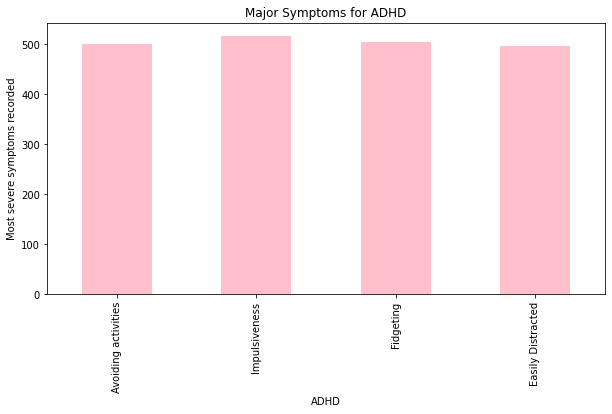

PNEUMONIA


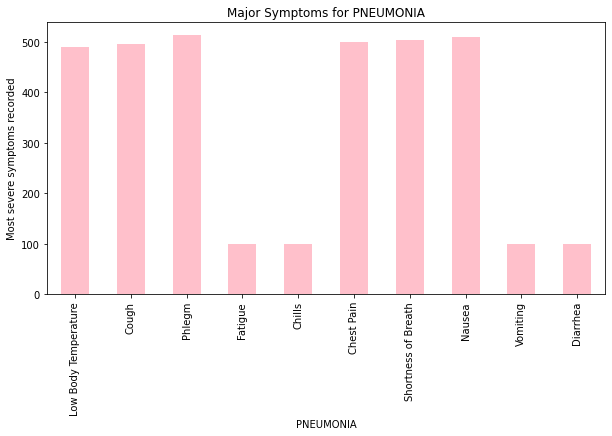

HYPERTENSION


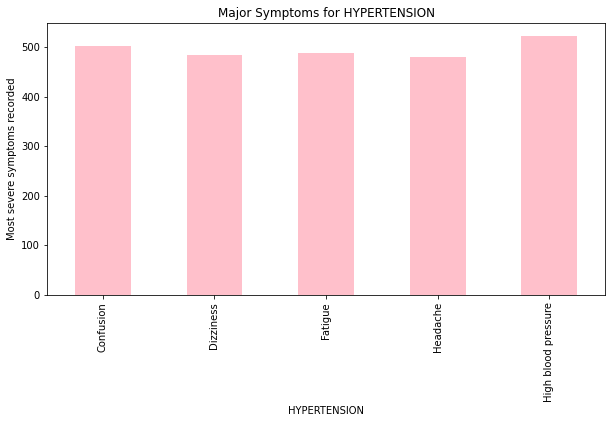

ACNE


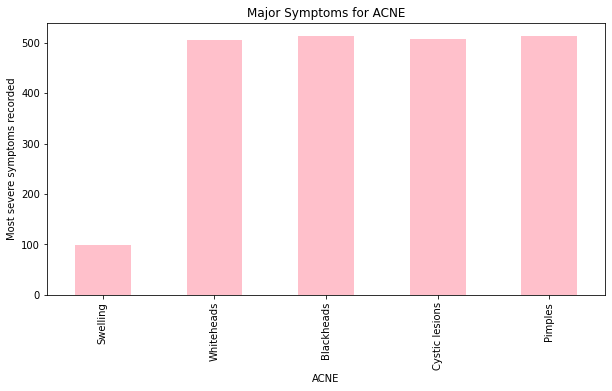

VIRAL FEVER


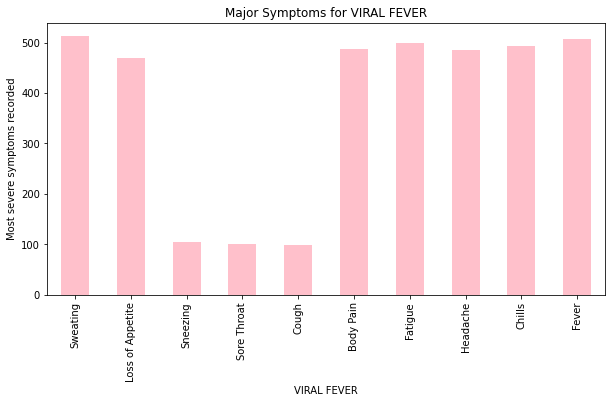

BRONCHITIS


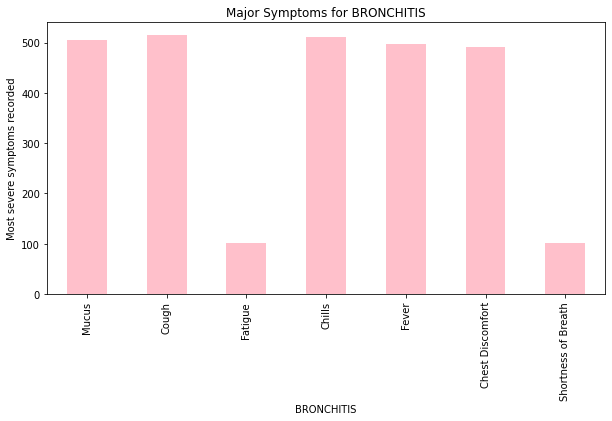

INFECTION


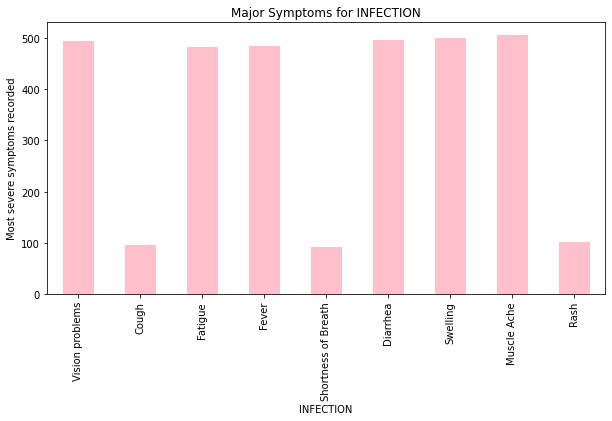

DIABTIES


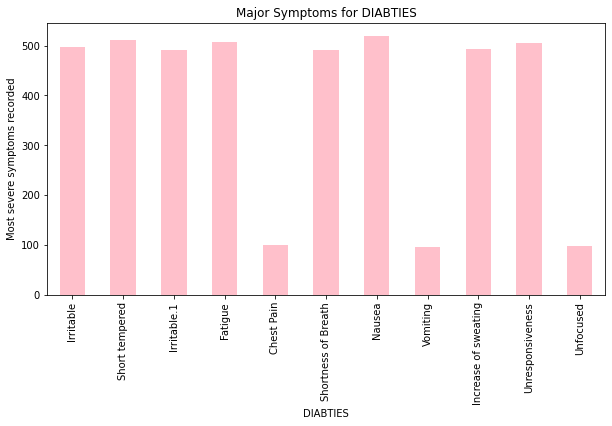

ASTHMA


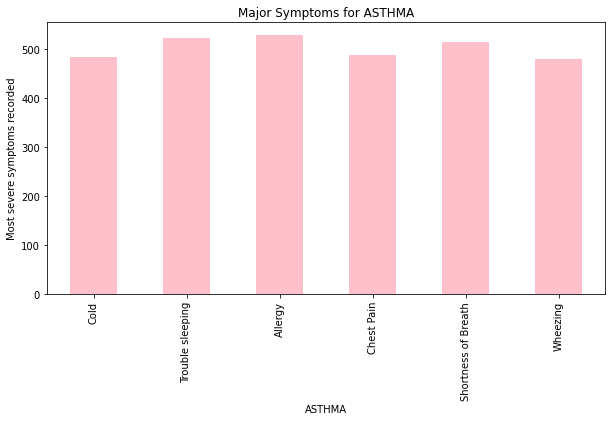

MEASLES


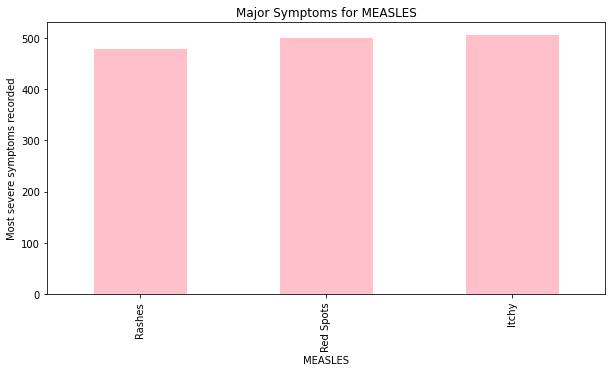

POLYCYSTIC OVARY SYNDROME


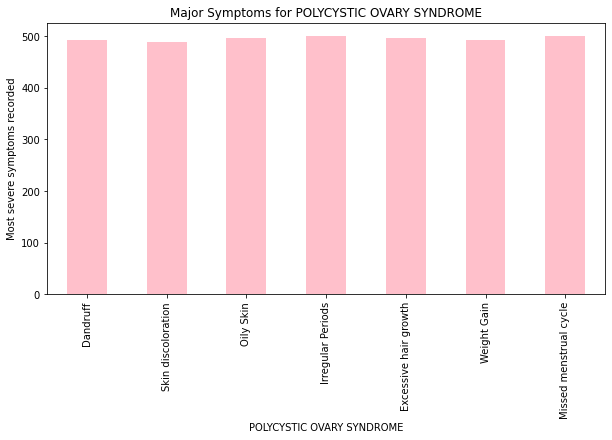

COMMON COLD


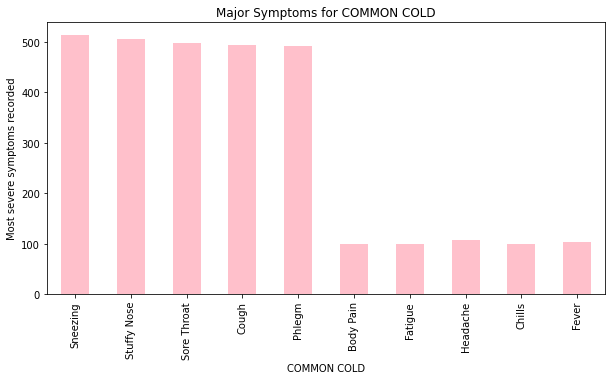

DENGUE FEVER


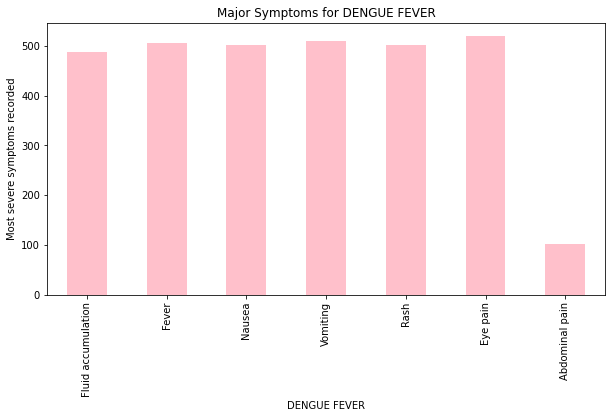

HYPOTHYROIDISM


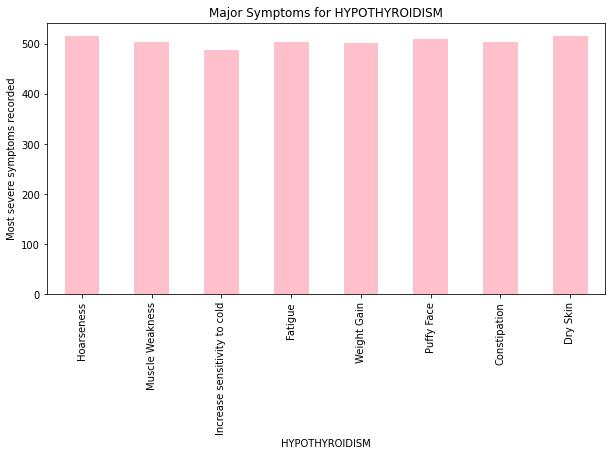

EBOLA


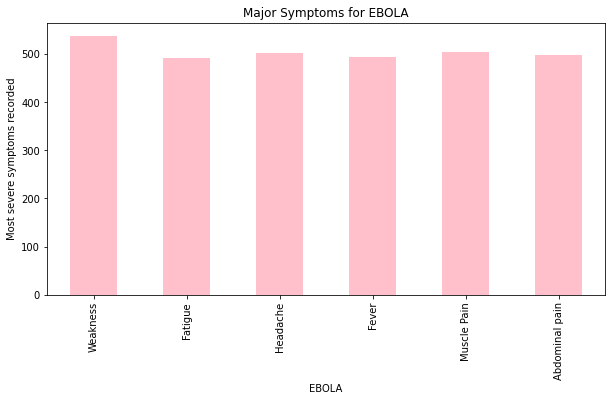

INSOMNIA


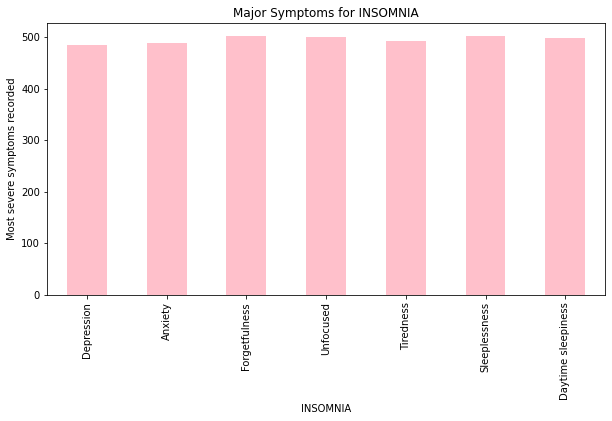

BLADDER STONES


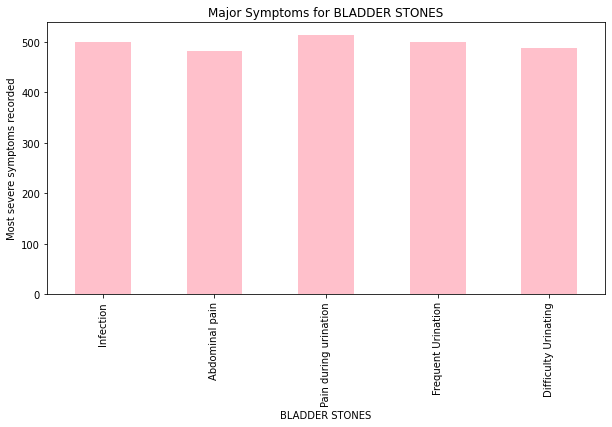

HAY FEVER


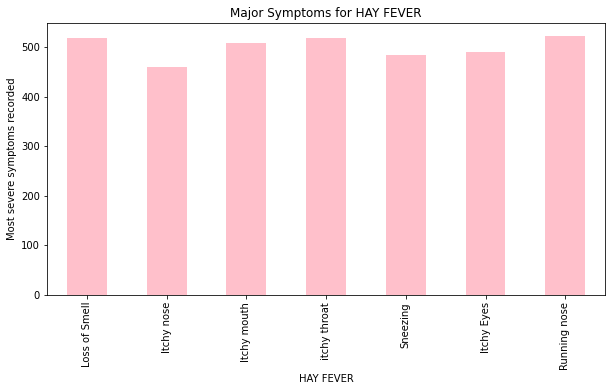

BACK PAIN


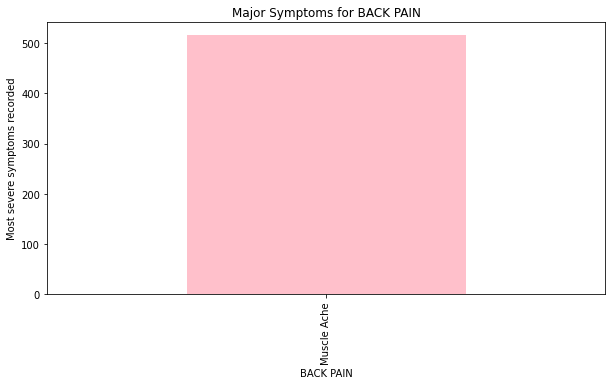

GASTRITIS


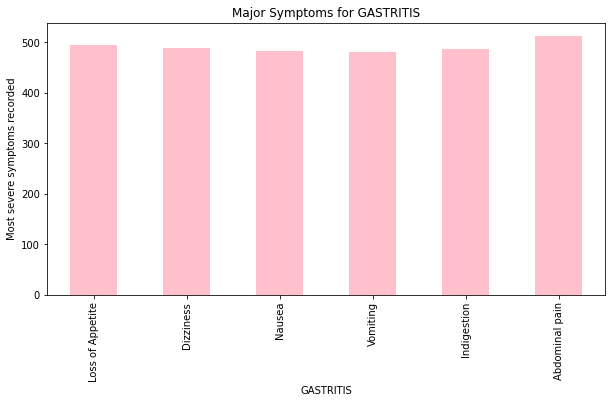

ARTHRITIS


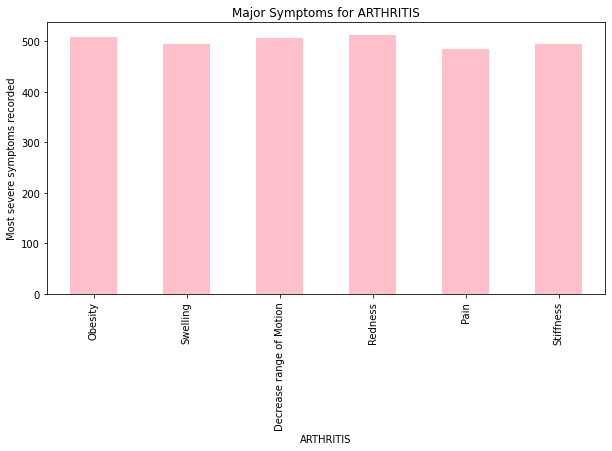

COVID-19


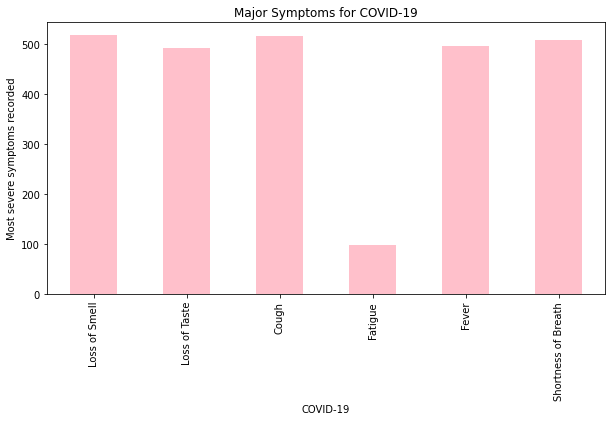

CHOLERA


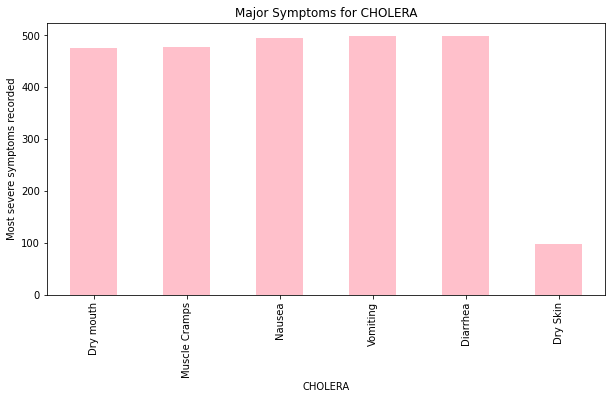

In [ ]:
#plotting bar plot to show which symptoms has been reported as most severe for a disease
import matplotlib.pyplot as plt
for i in target:
  print(i)  
  ax = DataFrameDict[i].sum().plot.bar(figsize = (10,5), color = 'pink')
  ax.set_title('Major Symptoms for ' + i) 
  ax.set_xlabel(i) 
  ax.set_ylabel('Most severe symptoms recorded')
  plt.show()
#for i in target:
 # DataFrameDict[i].sum().plot.bar()
  

HIV/AIDS


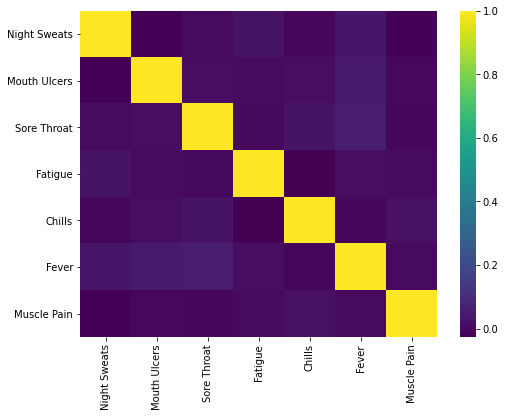

PREGNANCY


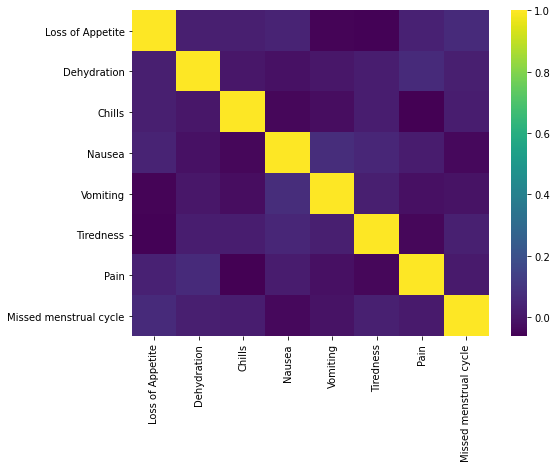

ADHD


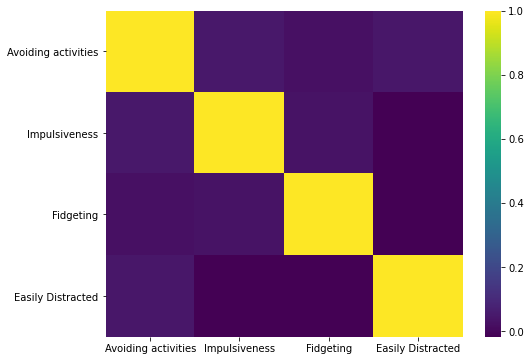

PNEUMONIA


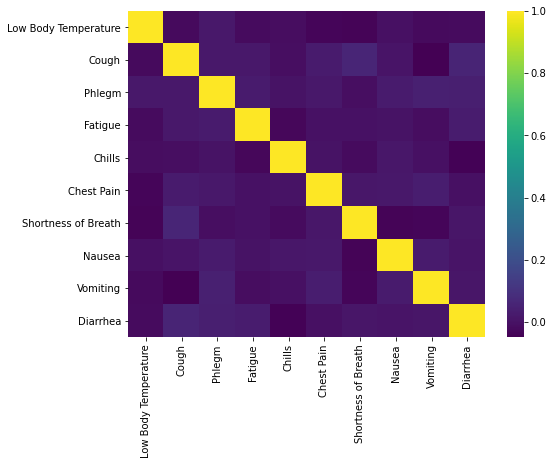

HYPERTENSION


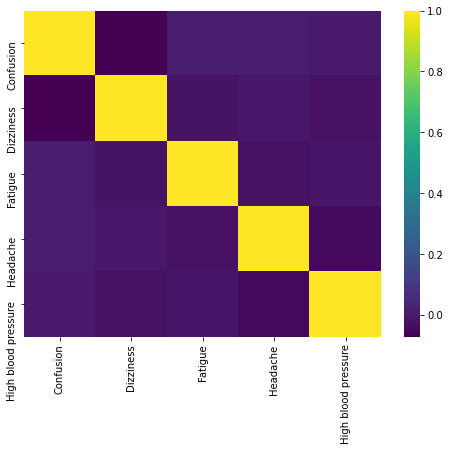

ACNE


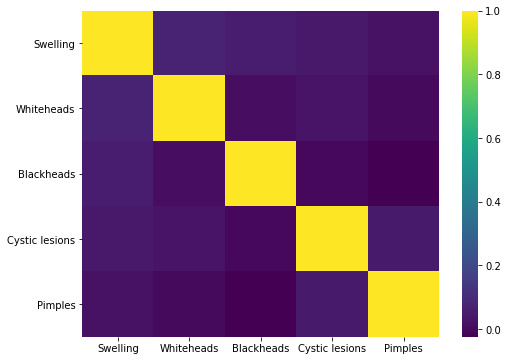

VIRAL FEVER


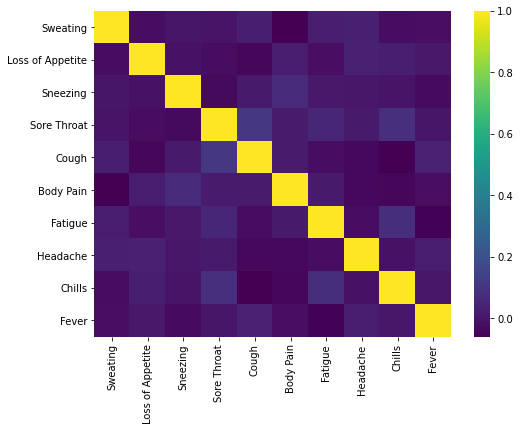

BRONCHITIS


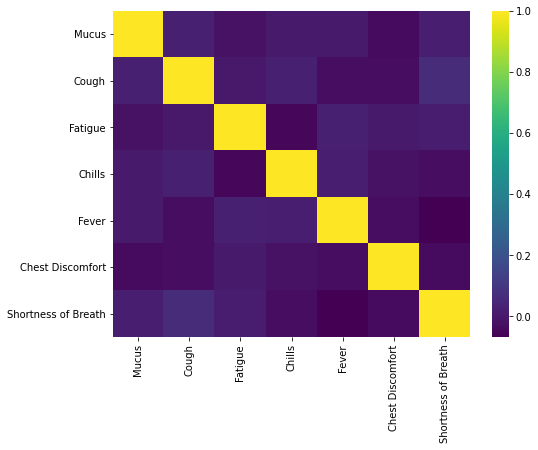

INFECTION


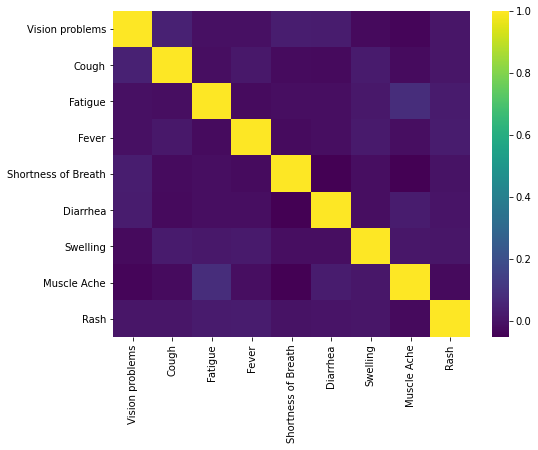

DIABTIES


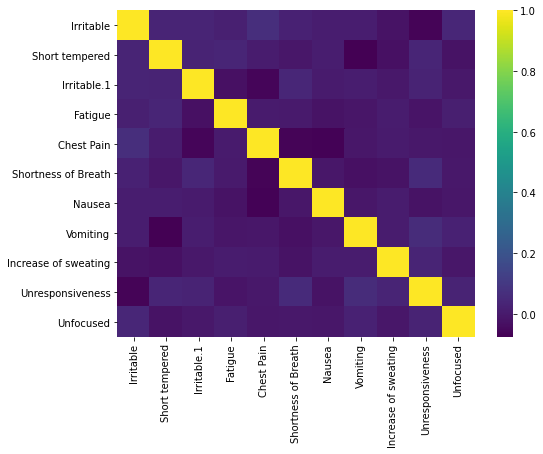

ASTHMA


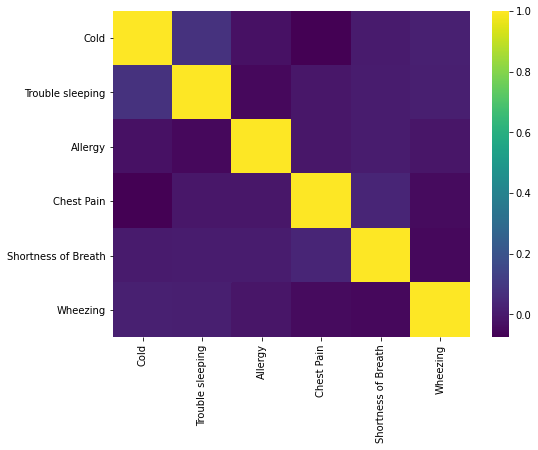

MEASLES


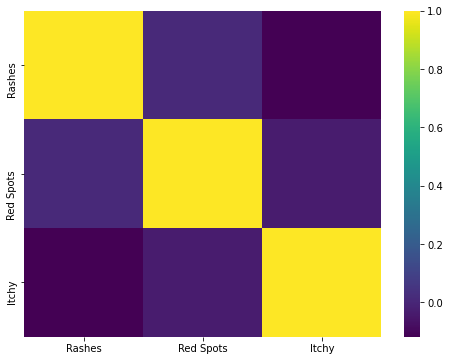

POLYCYSTIC OVARY SYNDROME


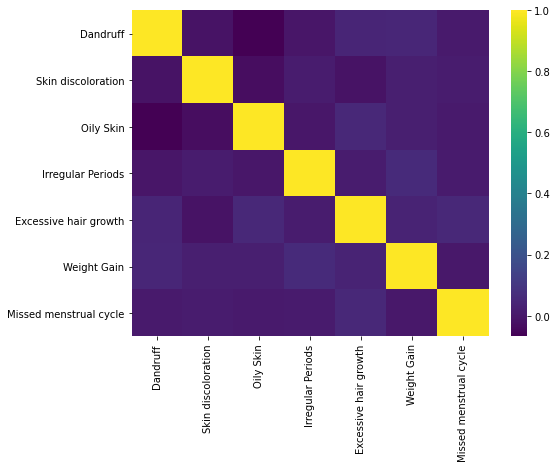

COMMON COLD


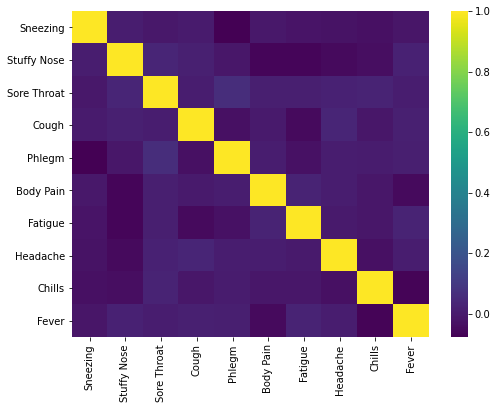

DENGUE FEVER


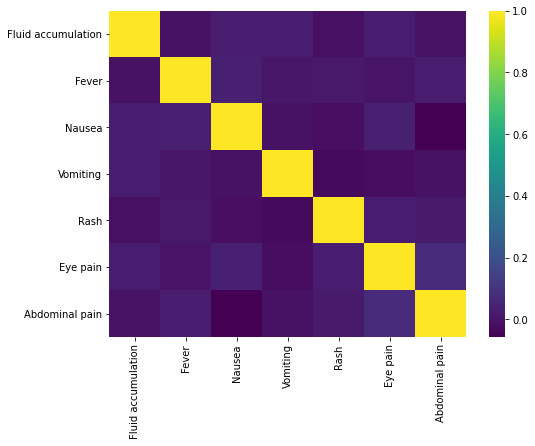

HYPOTHYROIDISM


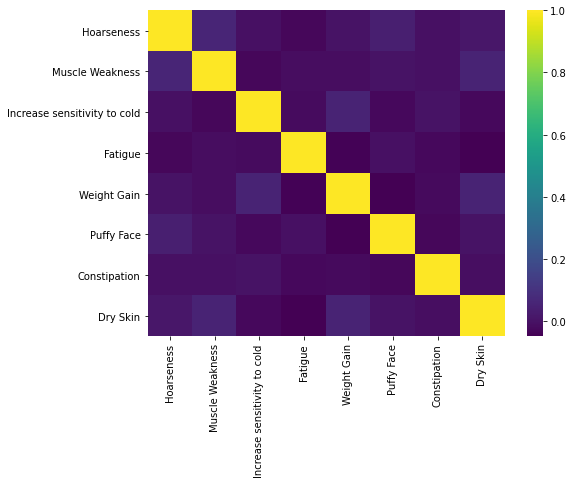

EBOLA


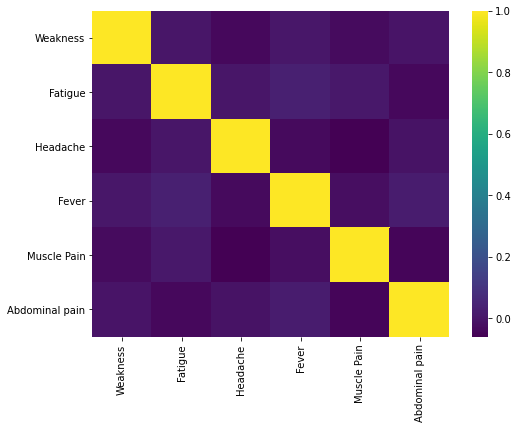

INSOMNIA


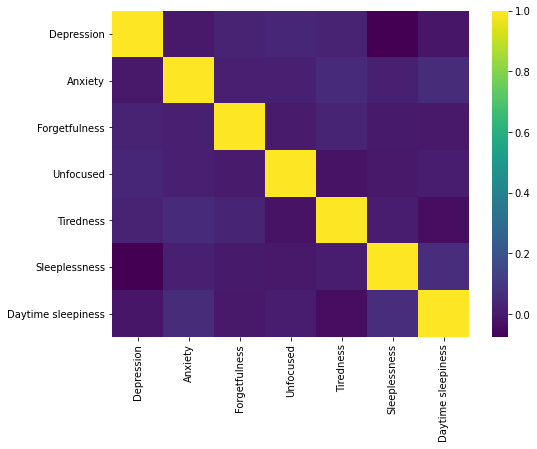

BLADDER STONES


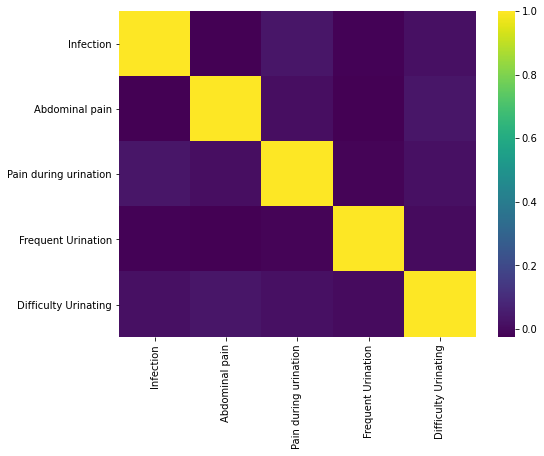

HAY FEVER


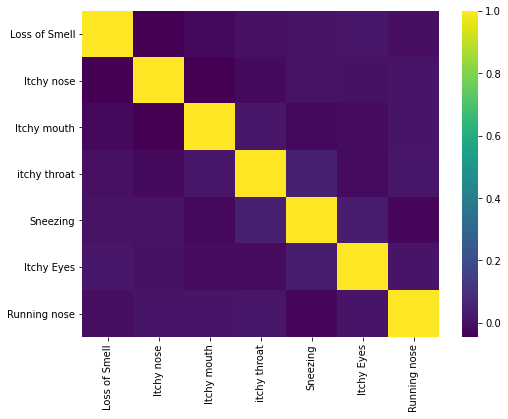

BACK PAIN


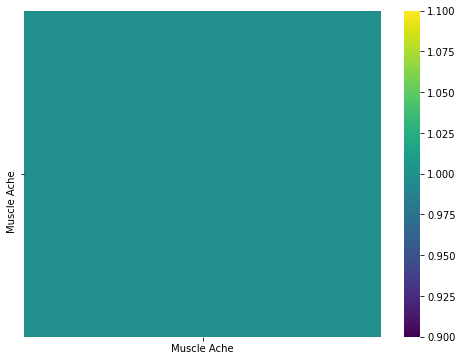

GASTRITIS


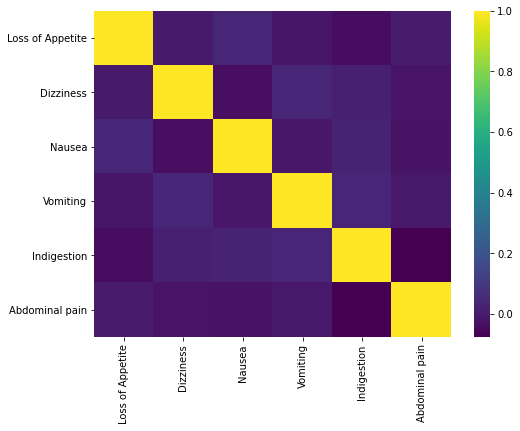

ARTHRITIS


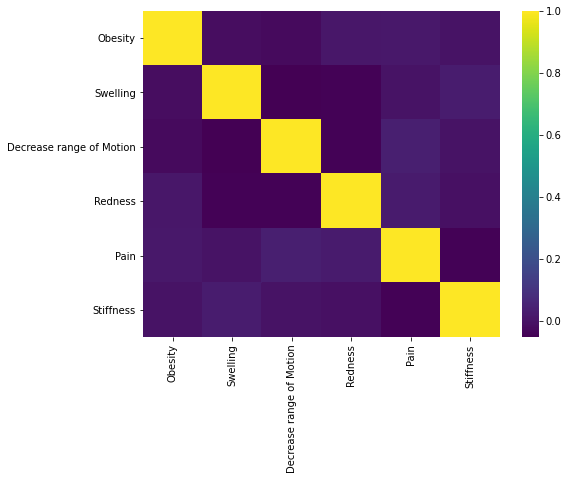

COVID-19


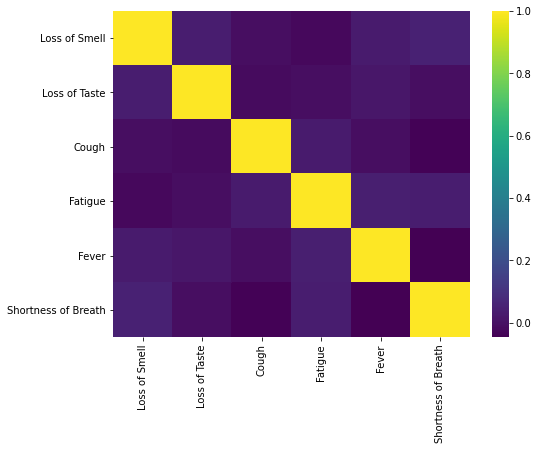

CHOLERA


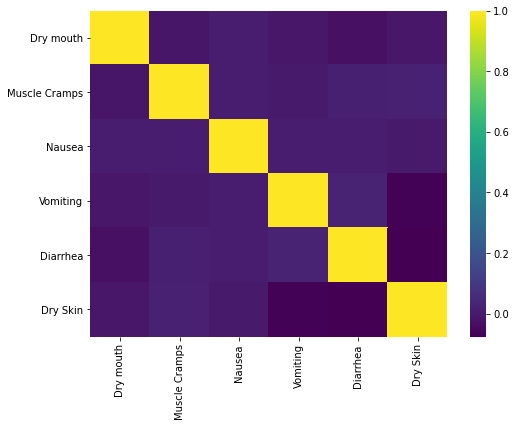

In [ ]:
#plotting correlation matrix to show which symptoms affect other symptoms
import seaborn as sns
# correlation for acne
for i in target:
  print(i)
  corr = DataFrameDict[i].corr()
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)
  plt.show()
  plt.figure(figsize=(8,6))
  sns.heatmap(corr, 
              xticklabels=corr.columns.values,
              yticklabels=corr.columns.values,
              cmap=sns.color_palette("viridis", as_cmap=True))
  
  plt.show()

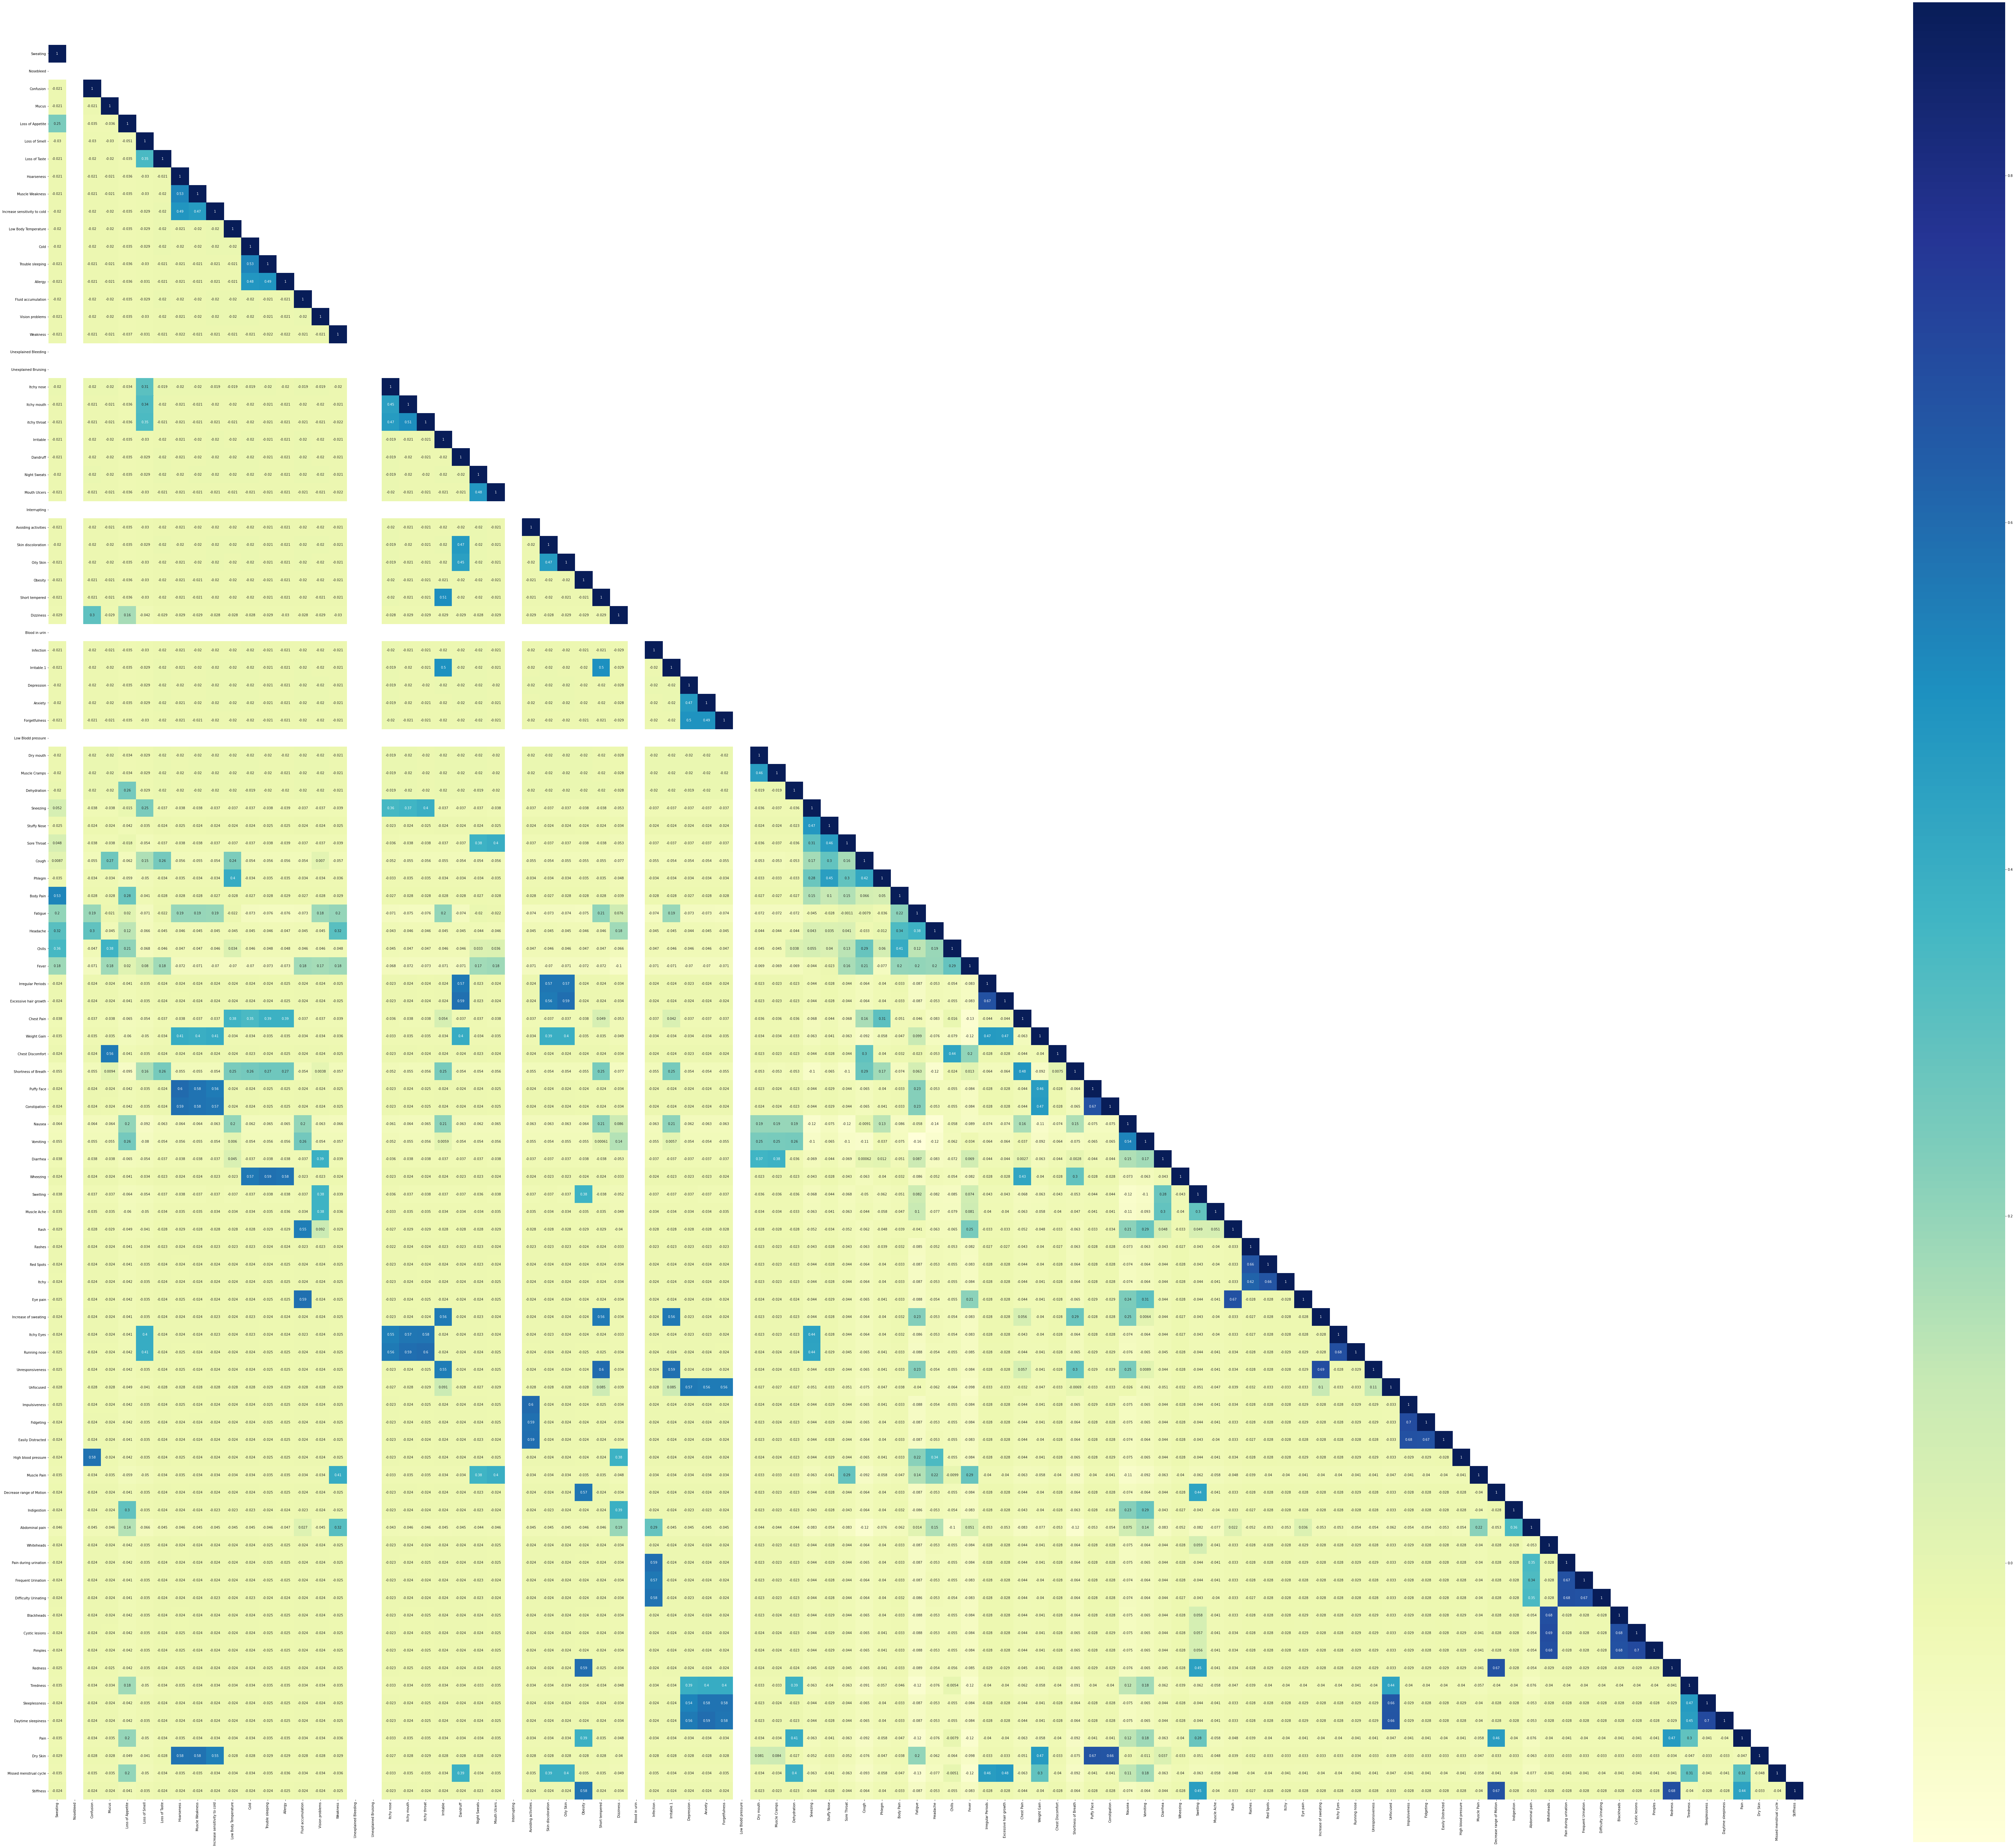

In [20]:
#checking the relationship between the variables by applying the correlation 
corr = df.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
plt.subplots_adjust(left = 0.5, right = 16 , top = 20, bottom = 0.5)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")